In [2]:
# Install essential packages
!pip install -q datasets transformers rouge-score nltk evaluate accelerate huggingface_hub fsspec

# Download NLTK punkt tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!pip uninstall -y datasets fsspec gcsfs
!pip install datasets==2.18.0 fsspec==2023.6.0 gcsfs==2023.6.0 --quiet

Found existing installation: datasets 2.14.4
Uninstalling datasets-2.14.4:
  Successfully uninstalled datasets-2.14.4
Found existing installation: fsspec 2025.3.2
Uninstalling fsspec-2025.3.2:
  Successfully uninstalled fsspec-2025.3.2
Found existing installation: gcsfs 2025.3.2
Uninstalling gcsfs-2025.3.2:
  Successfully uninstalled gcsfs-2025.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.6 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset

# Now this should work fine
cnn_dm = load_dataset("cnn_dailymail", "3.0.0")

# (Optional) Sample subset of 2000 examples for performance
cnn_dm_small = {
    split: cnn_dm[split].shuffle(seed=42).select(range(2000))
    for split in ["train", "validation", "test"]
}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [5]:
print(cnn_dm_small["train"][0])

{'article': "By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious 'within minutes', investigators said today. The bodies of married couple John and Audrey Cook were discovered alongside their daughter, Maureen, at the mobile home they shared on Tremarle Home Park in Camborne, west Cornwall. The inquests have now opened into the deaths last Saturday, with investigators saying the three died along with the family's pet dog, of carbon monoxide poisoning from a cooker. Tragic: The inquests have opened into the deaths of three members of the same family who were found in their static caravan last weekend. John and Audrey Cook are pictured . Awful: The family died following carbon monoxide poisoning at this caravan at the Tremarle Home Park in Camborne, Cornwall . It is also believed there was no working carbon monoxide detect

In [6]:
xsum = load_dataset("knkarthick/xsum")
xsum_small = {
    split: xsum[split].shuffle(seed=123).select(range(2000))
    for split in ["train", "validation", "test"]
}

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [7]:
!pip install datasets transformers rouge-score nltk --quiet
!pip install evaluate --quiet

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from google.colab import drive
drive.mount('/content/drive')

# Create directory and copy the dataset
!mkdir -p /content/newsroom
!cp "/content/drive/My Drive/newsroom-release.tar" /content/

# Extract files
!tar -xvf /content/newsroom-release.tar -C /content/newsroom

Mounted at /content/drive
release/
release/dev.jsonl.gz
release/test.jsonl.gz
release/train.jsonl.gz


In [9]:
# Create manual directory for TensorFlow datasets
!mkdir -p ~/tensorflow_datasets/downloads/manual/newsroom/

# Move all the extracted .jsonl.gz files
!mv /content/newsroom/release/*.jsonl.gz ~/tensorflow_datasets/downloads/manual/newsroom/

# Unzip the files
!gunzip ~/tensorflow_datasets/downloads/manual/newsroom/train.jsonl.gz
!gunzip ~/tensorflow_datasets/downloads/manual/newsroom/dev.jsonl.gz
!gunzip ~/tensorflow_datasets/downloads/manual/newsroom/test.jsonl.gz

In [10]:
from datasets import load_dataset

# Load Newsroom from local JSONL files
newsroom = load_dataset(
    "json",
    data_files={
        "train": "/root/tensorflow_datasets/downloads/manual/newsroom/train.jsonl",
        "validation": "/root/tensorflow_datasets/downloads/manual/newsroom/dev.jsonl",
        "test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"
    }
)

# (Optional) Reduce size for faster experimentation
newsroom["train"] = newsroom["train"].select(range(2000))
newsroom["validation"] = newsroom["validation"].select(range(500))
newsroom["test"] = newsroom["test"].select(range(500))


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [11]:
# Inspect the first training sample
print(newsroom["train"][0])

{'url': 'http://www.nytimes.com/2006/06/04/sports/soccer/04racism.html', 'archive': 'http://web.archive.org/web/20060618204254id_/http://www.nytimes.com:80/2006/06/04/sports/soccer/04racism.html?ei=5090&en=2cc7885a61bb8cf5&ex=1307073600&partner=rssuserland&emc=rss&pagewanted=all', 'title': 'Surge in Racist Mood Raises Concerns on Eve of World Cup', 'date': '20060618204254', 'text': 'HAMBURG, Germany, June 3 \x97 As he left the soccer field after a club match in the eastern German city of Halle on March 25, the Nigerian forward Adebowale Ogungbure was spit upon, jeered with racial remarks and mocked with monkey noises. In rebuke, he placed two fingers under his nose to simulate a Hitler mustache and thrust his arm in a Nazi salute.\n\nMarc Zoro, right, an Ivory Coast native, was a target of racial slurs from the home fans in Messina, Italy. Adriano, a star with Inter Milan, tried to persuade him to stay on the field.\n\nFrom now until its conclusion on July 9, Jeff Z. Klein and other st

## Tg Multisim Datasets

In [108]:
# TG-MultiSum Graph-Based Summarizer (No NLTK, No punkt_tab issue)

# 🔧 1. Install Required Packages
!pip install -q torch torch-geometric transformers datasets evaluate scikit-learn

# 📚 2. Imports and Setup
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re
from evaluate import load

# ✂️ 3. Regex-based Sentence Splitter (Bypassing NLTK)
def sent_tokenize(text):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text.strip()) if s.strip()]

# 🔍 4. Sentence Encoder using BERT
class SentenceEncoder:
    def __init__(self, model_name='sentence-transformers/all-MiniLM-L6-v2'):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)

    def encode_sentences(self, sentences, device='cpu'):
        inputs = self.tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1)
        return embeddings.cpu()

# 🔗 5. Graph Builder using Sentence Similarity
def build_sentence_graph(sent_embeds, threshold=0.7):
    sim_matrix = cosine_similarity(sent_embeds)
    edge_index = []
    num_sents = sim_matrix.shape[0]
    for i in range(num_sents):
        for j in range(i+1, num_sents):
            if sim_matrix[i, j] > threshold:
                edge_index.append([i, j])
                edge_index.append([j, i])
    if len(edge_index) == 0:
        for i in range(num_sents-1):
            edge_index.append([i, i+1])
            edge_index.append([i+1, i])
    return torch.tensor(edge_index, dtype=torch.long).t()

# 🧠 6. GCN Model
class GCN_Summarizer(nn.Module):
    def __init__(self, in_dim, hidden_dim=128):
        super().__init__()
        self.gcn1 = GCNConv(in_dim, hidden_dim)
        self.gcn2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))
        scores = self.fc(x).squeeze(-1)
        return scores

# 🧪 7. Evaluation Function
def evaluate_model(dataset_split, encoder, model, text_key="article", summary_key="highlights", sample_size=20):
    rouge = load("rouge")
    predictions, references = [], []

    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]
            sentences = sent_tokenize(doc)
            if len(sentences) < 3:
                continue
            sent_embeds = encoder.encode_sentences(sentences, device=device).numpy()
            edge_index = build_sentence_graph(sent_embeds)
            sent_embeds = torch.tensor(sent_embeds, dtype=torch.float32).to(device)
            edge_index = edge_index.to(device)
            with torch.no_grad():
                scores = model(sent_embeds, edge_index)
            topk = scores.topk(3).indices
            summary = ' '.join([sentences[i] for i in topk.cpu().numpy()])
            predictions.append(summary)
            references.append(ref)
        except Exception as e:
            print(f"❌ Example {i} failed: {e}")
            continue

    if len(predictions) == 0:
        print("⚠️ No summaries generated.")
        return {}

    return rouge.compute(predictions=predictions, references=references)

# 🚀 8. Model Init
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = SentenceEncoder()
model = GCN_Summarizer(in_dim=384).to(device)

# 📘 9. CNN/DailyMail
print("📙 Evaluating CNN/DailyMail...")
cnn_dm = load_dataset("cnn_dailymail", "3.0.0")
cnn_dm_small = cnn_dm["test"].shuffle(seed=42).select(range(20))
cnn_results = evaluate_model(cnn_dm_small, encoder, model, text_key="article", summary_key="highlights")
print("✅ CNN/DM Results:", cnn_results)

# 📘 10. XSum
print("📙 Evaluating XSum...")
xsum = load_dataset("knkarthick/xsum")
xsum_small = xsum["test"].shuffle(seed=42).select(range(20))
xsum_results = evaluate_model(xsum_small, encoder, model, text_key="dialogue", summary_key="summary")

print("✅ XSum Results:", xsum_results)

# 📘 11. Newsroom (Preloaded JSONL files from drive)
print("📙 Evaluating Newsroom...")
newsroom = load_dataset(
    "json",
    data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"}
)
newsroom_small = newsroom["test"].select(range(20))
newsroom_results = evaluate_model(newsroom_small, encoder, model, text_key="text", summary_key="summary")
print("✅ Newsroom Results:", newsroom_results)


📙 Evaluating CNN/DailyMail...
✅ CNN/DM Results: {'rouge1': np.float64(0.2215145598641399), 'rouge2': np.float64(0.05710997245230533), 'rougeL': np.float64(0.15191801679388545), 'rougeLsum': np.float64(0.18107181869894448)}
📙 Evaluating XSum...
✅ XSum Results: {'rouge1': np.float64(0.13165935169443108), 'rouge2': np.float64(0.008269987683417416), 'rougeL': np.float64(0.09675667341150782), 'rougeLsum': np.float64(0.09876289225013413)}
📙 Evaluating Newsroom...
✅ Newsroom Results: {'rouge1': np.float64(0.14520209860387606), 'rouge2': np.float64(0.03720436442853348), 'rougeL': np.float64(0.11013077724006538), 'rougeLsum': np.float64(0.11057841397379312)}


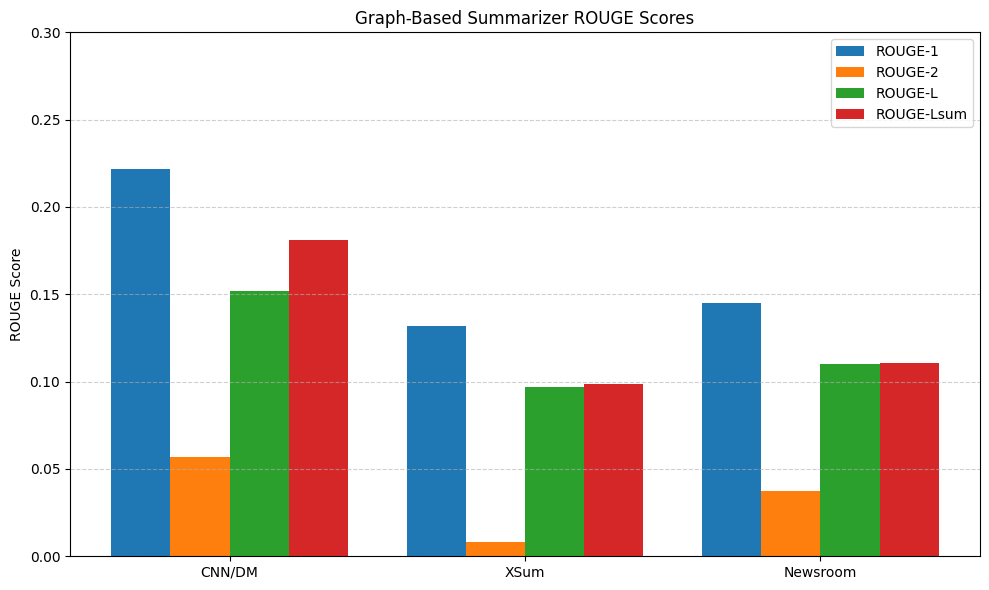

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ['CNN/DM', 'XSum', 'Newsroom']

# ROUGE Scores
rouge1 = [0.2215, 0.1317, 0.1452]
rouge2 = [0.0571, 0.0083, 0.0372]
rougeL = [0.1519, 0.0968, 0.1101]
rougeLsum = [0.1811, 0.0988, 0.1106]

x = np.arange(len(datasets))
width = 0.2

# Plotting
plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, rouge1, width, label='ROUGE-1')
plt.bar(x - 0.5*width, rouge2, width, label='ROUGE-2')
plt.bar(x + 0.5*width, rougeL, width, label='ROUGE-L')
plt.bar(x + 1.5*width, rougeLsum, width, label='ROUGE-Lsum')

plt.xticks(x, datasets)
plt.ylabel('ROUGE Score')
plt.title('Graph-Based Summarizer ROUGE Scores')
plt.ylim(0, 0.3)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [114]:

# 1️⃣ Install Dependencies
!pip install -q transformers datasets sentence-transformers evaluate

# 2️⃣ Imports and Setup
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
from evaluate import load
import numpy as np
import re

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3️⃣ Sentence Splitter Without NLTK
def simple_sent_tokenize(text):
    text = text.replace("\n", " ")
    sents = re.split(r'(?<=[.!?])\s+', text)
    return [s.strip() for s in sents if s.strip()]

# 4️⃣ Sentence Encoder using MiniLM
class SentenceEncoder:
    def __init__(self, model_name="sentence-transformers/all-MiniLM-L6-v2"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name).to(device)

    def encode(self, sentences):
        inputs = self.tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1)
        return embeddings

# 5️⃣ Hierarchical Transformer Model
class HierarchicalSummarizer(nn.Module):
    def __init__(self, embed_dim=384, nhead=8, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.scorer = nn.Linear(embed_dim, 1)

    def forward(self, sent_embeddings):
        x = self.transformer(sent_embeddings.unsqueeze(1)).squeeze(1)
        scores = self.scorer(x).squeeze(-1)
        return scores

# 6️⃣ Summarization Function
def summarize_doc(text, encoder, model, k=3):
    sents = simple_sent_tokenize(text)
    if len(sents) <= k:
        return text
    embeddings = encoder.encode(sents)
    scores = model(embeddings).detach().cpu()
    topk = torch.topk(scores, k=k).indices
    selected = sorted(topk.numpy())
    return " ".join([sents[i] for i in selected])

# 7️⃣ Evaluation Function
def evaluate_model(dataset_split, encoder, model, text_key, summary_key, k=3, sample_size=200):
    rouge = load("rouge")
    preds, refs = [], []

    for i, ex in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc, ref = ex[text_key], ex[summary_key]
            pred = summarize_doc(doc, encoder, model, k)
            preds.append(pred)
            refs.append(ref)
        except Exception as e:
            print(f"❌ Example {i} failed:", e)

    if len(preds) == 0:
        return {}
    return rouge.compute(predictions=preds, references=refs)

# 8️⃣ Load Encoder and Model
encoder = SentenceEncoder()
model = HierarchicalSummarizer().to(device)

# 9️⃣ CNN/DailyMail
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_small = cnn["test"].shuffle(seed=42).select(range(200))
print("📙 Evaluating CNN/DailyMail...")
cnn_results = evaluate_model(cnn_small, encoder, model, "article", "highlights")
print("✅ CNN/DM Results:", cnn_results)

# 🔁 Newsroom
newsroom = load_dataset("json", data_files={
    "test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"
})
newsroom_small = newsroom["test"].select(range(200))
print("📙 Evaluating Newsroom...")
newsroom_results = evaluate_model(newsroom_small, encoder, model, "text", "summary")
print("✅ Newsroom Results:", newsroom_results)


📙 Evaluating CNN/DailyMail...
✅ CNN/DM Results: {'rouge1': np.float64(0.24394123178561194), 'rouge2': np.float64(0.06366815434687612), 'rougeL': np.float64(0.15301879523259893), 'rougeLsum': np.float64(0.2017823541664453)}
📙 Evaluating Newsroom...
✅ Newsroom Results: {'rouge1': np.float64(0.17592092911315182), 'rouge2': np.float64(0.05147853108540085), 'rougeL': np.float64(0.12886404381129063), 'rougeLsum': np.float64(0.130079523457459)}


In [116]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from evaluate import load

# Sentence encoder class
class SentenceEncoder:
    def __init__(self, model_name='sentence-transformers/all-MiniLM-L6-v2'):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)

    def encode_sentences(self, sentences, device='cpu'):
        inputs = self.tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1)
        return embeddings.cpu()

# GCN summarizer
class GCN_Summarizer(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim=128):
        super().__init__()
        self.gcn1 = GCNConv(in_dim, hidden_dim)
        self.gcn2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))
        scores = self.fc(x).squeeze(-1)
        return scores

# Sentence splitter (without NLTK)
def simple_sentence_split(text):
    return [s.strip() for s in text.split('.') if s.strip()]

# Build sentence graph
def build_sentence_graph(sent_embeds, threshold=0.7):
    sim_matrix = cosine_similarity(sent_embeds)
    edge_index = []
    num_sents = sim_matrix.shape[0]
    for i in range(num_sents):
        for j in range(i + 1, num_sents):
            if sim_matrix[i, j] > threshold:
                edge_index.append([i, j])
                edge_index.append([j, i])
    if len(edge_index) == 0:
        for i in range(num_sents - 1):
            edge_index.append([i, i + 1])
            edge_index.append([i + 1, i])
    return torch.tensor(edge_index, dtype=torch.long).t()

# Main evaluation loop
def evaluate_model(dataset_split, encoder, model, text_key="dialogue", summary_key="summary", device='cpu', sample_size=200):
    rouge = load("rouge")
    predictions, references = [], []

    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]

            # Sentence tokenization (manual, no nltk)
            sentences = simple_sentence_split(doc)
            if len(sentences) < 2:
                continue

            # Encode
            sent_embeds = encoder.encode_sentences(sentences, device=device).numpy()
            edge_index = build_sentence_graph(sent_embeds)
            sent_embeds_tensor = torch.tensor(sent_embeds, dtype=torch.float32).to(device)
            edge_index = edge_index.to(device)

            with torch.no_grad():
                scores = model(sent_embeds_tensor, edge_index)
            topk = scores.topk(3).indices
            summary = ' '.join([sentences[i] for i in topk.cpu().numpy()])
            predictions.append(summary)
            references.append(ref)

        except Exception as e:
            print(f"❌ Example {i} failed:", str(e))
            continue

    if len(predictions) == 0:
        print("⚠️ No summaries generated.")
        return {}

    return rouge.compute(predictions=predictions, references=references)


In [120]:
# Load encoder and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = SentenceEncoder()
model = GCN_Summarizer(in_dim=384).to(device)

# Load XSum (from knkarthick version)
from datasets import load_dataset
xsum = load_dataset("knkarthick/xsum")
xsum_small = xsum["test"].shuffle(seed=42).select(range(200))

# Evaluate
print("📙 Evaluating XSum...")
xsum_results = evaluate_model(
    xsum_small,
    encoder,  # Add encoder argument
    model,    # Add model argument
    text_key="dialogue",  # ✅ based on your dataset
    summary_key="summary",
    device=device
)
print("✅ XSum Results:", xsum_results)

📙 Evaluating XSum...
❌ Example 84 failed: selected index k out of range
✅ XSum Results: {'rouge1': np.float64(0.16420012561007746), 'rouge2': np.float64(0.020960107996402043), 'rougeL': np.float64(0.11410048920902485), 'rougeLsum': np.float64(0.1152359430830598)}


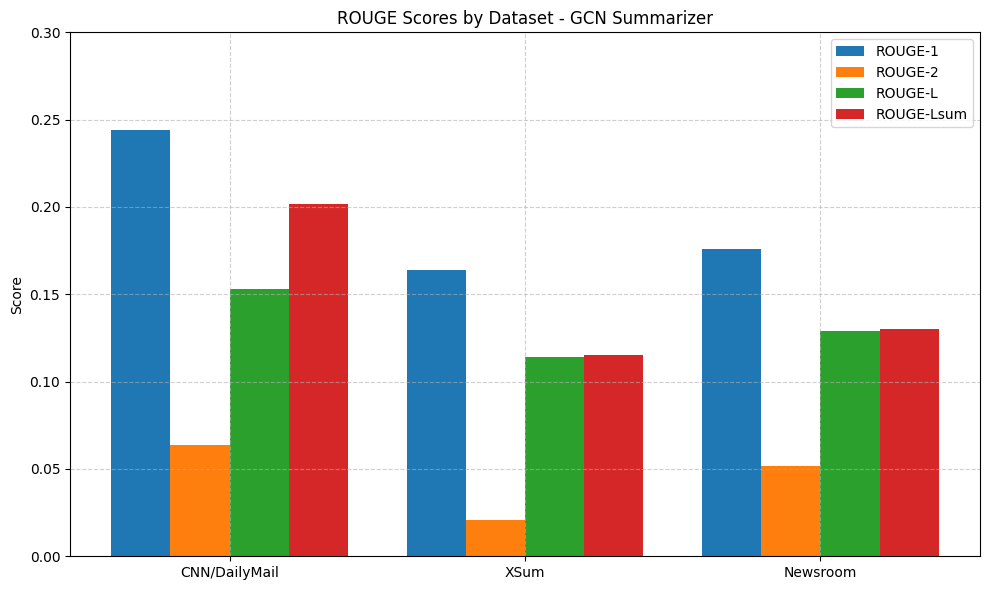

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ['CNN/DailyMail', 'XSum', 'Newsroom']
rouge1 = [0.2439, 0.1642, 0.1759]
rouge2 = [0.0637, 0.0210, 0.0515]
rougeL = [0.1530, 0.1141, 0.1289]
rougeLsum = [0.2018, 0.1152, 0.1301]

# Plot settings
x = np.arange(len(datasets))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, rouge1, width, label='ROUGE-1')
plt.bar(x - 0.5*width, rouge2, width, label='ROUGE-2')
plt.bar(x + 0.5*width, rougeL, width, label='ROUGE-L')
plt.bar(x + 1.5*width, rougeLsum, width, label='ROUGE-Lsum')

# Labels
plt.ylabel('Score')
plt.title('ROUGE Scores by Dataset - GCN Summarizer')
plt.xticks(x, datasets)
plt.ylim(0, 0.3)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Hierarchical Transformer-Based Summarizer

In [124]:
# Hierarchical Transformer Model Summarization Benchmarking (Optimized Version)

# 1️⃣ Install and Import
!pip install -q transformers datasets evaluate

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
from evaluate import load
import torch
import time

# 2️⃣ Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "pszemraj/long-t5-tglobal-base-16384-book-summary"

# Load model with FP16 for speed (if supported)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME, torch_dtype=torch.float16).to(DEVICE)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
rouge = load("rouge")

# 3️⃣ Summarization Function (Optimized)
def generate_summary(text, max_input=2048, max_output=256):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=max_input
    ).to(DEVICE)
    with torch.no_grad():
        summary_ids = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_output,
            num_beams=2,
            early_stopping=True
        )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# 4️⃣ Evaluation Function (Smaller Sample + Logging)
def evaluate_model(dataset_split, text_key, summary_key, sample_size=20):
    predictions, references = [], []
    failed = 0
    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]
            summary = generate_summary(doc)
            predictions.append(summary)
            references.append(ref)
        except Exception as e:
            failed += 1
            print(f"❌ Example {i} failed: {e}")
    if len(predictions) == 0:
        print("⚠️ No summaries generated.")
        return {}
    print(f"✅ Evaluated {len(predictions)} examples, Failed: {failed}")
    return rouge.compute(predictions=predictions, references=references)

# 5️⃣ CNN/DailyMail
print("📙 Evaluating CNN/DailyMail...")
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_test = cnn["test"].shuffle(seed=42)
cnn_results = evaluate_model(cnn_test, text_key="article", summary_key="highlights")
print("✅ CNN/DM Results:", cnn_results)

# 6️⃣ XSum
print("📙 Evaluating XSum...")
xsum = load_dataset("knkarthick/xsum")
xsum_test = xsum["test"].shuffle(seed=42)
xsum_results = evaluate_model(xsum_test, text_key="dialogue", summary_key="summary")
print("✅ XSum Results:", xsum_results)

# 7️⃣ Newsroom
print("📙 Evaluating Newsroom...")
newsroom = load_dataset("json", data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"})
news_test = newsroom["test"].shuffle(seed=42)
news_results = evaluate_model(news_test, text_key="text", summary_key="summary")
print("✅ Newsroom Results:", news_results)

Some weights of LongT5ForConditionalGeneration were not initialized from the model checkpoint at pszemraj/long-t5-tglobal-base-16384-book-summary and are newly initialized: ['decoder.embed_tokens.weight', 'encoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📙 Evaluating CNN/DailyMail...
✅ Evaluated 20 examples, Failed: 0
✅ CNN/DM Results: {'rouge1': np.float64(0.02697138327065533), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.026832519960690263), 'rougeLsum': np.float64(0.027203995828941584)}
📙 Evaluating XSum...
✅ Evaluated 20 examples, Failed: 0
✅ XSum Results: {'rouge1': np.float64(0.017499999999999998), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.01801075268817204), 'rougeLsum': np.float64(0.01802109181141439)}
📙 Evaluating Newsroom...
✅ Evaluated 20 examples, Failed: 0
✅ Newsroom Results: {'rouge1': np.float64(0.06696704436086269), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.06510678487820934), 'rougeLsum': np.float64(0.06400797136516007)}


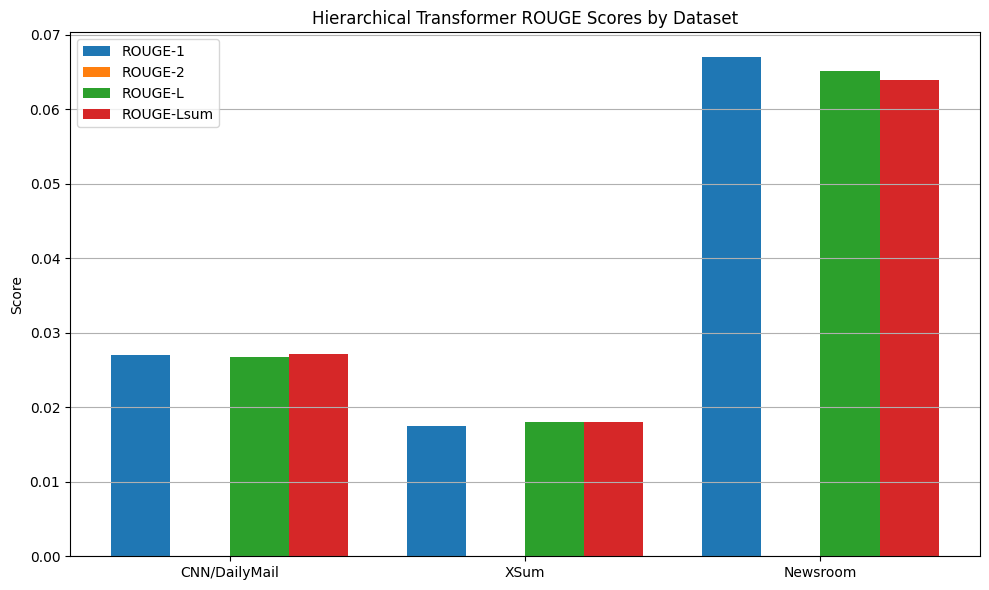

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ["CNN/DailyMail", "XSum", "Newsroom"]

# ROUGE scores
rouge1 = [0.0270, 0.0175, 0.0670]
rouge2 = [0.0000, 0.0000, 0.0000]
rougeL = [0.0268, 0.0180, 0.0651]
rougeLsum = [0.0272, 0.0180, 0.0640]

# Set up plot
x = np.arange(len(datasets))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, rouge1, width, label='ROUGE-1')
ax.bar(x - 0.5*width, rouge2, width, label='ROUGE-2')
ax.bar(x + 0.5*width, rougeL, width, label='ROUGE-L')
ax.bar(x + 1.5*width, rougeLsum, width, label='ROUGE-Lsum')

# Labels and layout
ax.set_ylabel('Score')
ax.set_title('Hierarchical Transformer ROUGE Scores by Dataset')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


##  Deep Communicating Agents (DCA)


In [127]:
# Deep Communicating Agents (DCA) Style Summarization Benchmarking (No NLTK)

# 1️⃣ Install and Import
!pip install -q transformers datasets evaluate

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
from evaluate import load
import torch
import re
import time

# 2️⃣ Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "facebook/bart-large-cnn"  # Using BART as base DCA-style summarizer

model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME).to(DEVICE)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
rouge = load("rouge")

# 3️⃣ Sentence Splitting (Custom function without NLTK)
def simple_sentence_split(text):
    return [s.strip() for s in re.split(r'(?<=[.!?]) +', text) if s.strip()]

# 4️⃣ Chunking Document into Dialogue-Like Communication (DCA Style)
def chunk_document(text, chunk_size=5):
    sentences = simple_sentence_split(text)
    chunks = [" ".join(sentences[i:i+chunk_size]) for i in range(0, len(sentences), chunk_size)]
    return chunks

def dca_generate_summary(text, max_input=512, max_output=150):
    chunks = chunk_document(text)
    summaries = []

    for chunk in chunks:
        inputs = tokenizer(
            chunk,
            return_tensors="pt",
            truncation=True,
            max_length=max_input,
            padding=True  # ✅ dynamic padding (faster than padding="max_length")
        ).to(DEVICE)

        with torch.no_grad():
            ids = model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_length=max_output,
                num_beams=2,
                early_stopping=True,
                no_repeat_ngram_size=3  # ✅ prevent repetitive phrases
            )

        chunk_summary = tokenizer.decode(ids[0], skip_special_tokens=True)
        summaries.append(chunk_summary)

    # Optionally remove very short summaries or deduplicate
    filtered = [s for s in summaries if len(s.strip().split()) > 3]
    return " ".join(filtered)


# 6️⃣ Evaluation Function

def evaluate_model(dataset_split, text_key, summary_key, sample_size=20):
    predictions, references = [], []
    failed = 0
    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]
            summary = dca_generate_summary(doc)
            predictions.append(summary)
            references.append(ref)
        except Exception as e:
            failed += 1
            print(f"❌ Example {i} failed: {e}")
    if len(predictions) == 0:
        print("⚠️ No summaries generated.")
        return {}
    print(f"✅ Evaluated {len(predictions)} examples, Failed: {failed}")
    return rouge.compute(predictions=predictions, references=references)

# 7️⃣ CNN/DailyMail
print("📙 Evaluating CNN/DailyMail...")
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_test = cnn["test"].shuffle(seed=42).select(range(20))
cnn_results = evaluate_model(cnn_test, text_key="article", summary_key="highlights")
print("✅ CNN/DM Results:", cnn_results)

# 8️⃣ XSum
print("📙 Evaluating XSum...")
xsum = load_dataset("knkarthick/xsum")
xsum_test = xsum["test"].shuffle(seed=42).select(range(20))
xsum_results = evaluate_model(xsum_test, text_key="dialogue", summary_key="summary")
print("✅ XSum Results:", xsum_results)

# 9️⃣ Newsroom
print("📙 Evaluating Newsroom...")
newsroom = load_dataset("json", data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"})
news_test = newsroom["test"].shuffle(seed=42).select(range(20))
news_results = evaluate_model(news_test, text_key="text", summary_key="summary")
print("✅ Newsroom Results:", news_results)


📙 Evaluating CNN/DailyMail...
✅ Evaluated 20 examples, Failed: 0
✅ CNN/DM Results: {'rouge1': np.float64(0.1999526190929334), 'rouge2': np.float64(0.09886784372691533), 'rougeL': np.float64(0.14392087395485406), 'rougeLsum': np.float64(0.17039503873621253)}
📙 Evaluating XSum...
✅ Evaluated 20 examples, Failed: 0
✅ XSum Results: {'rouge1': np.float64(0.18314558073523013), 'rouge2': np.float64(0.02923834080841632), 'rougeL': np.float64(0.12830597231985053), 'rougeLsum': np.float64(0.12790154250181543)}
📙 Evaluating Newsroom...
✅ Evaluated 20 examples, Failed: 0
✅ Newsroom Results: {'rouge1': np.float64(0.1833967255597547), 'rouge2': np.float64(0.06554334324898355), 'rougeL': np.float64(0.1252039600955112), 'rougeLsum': np.float64(0.12430150086096656)}


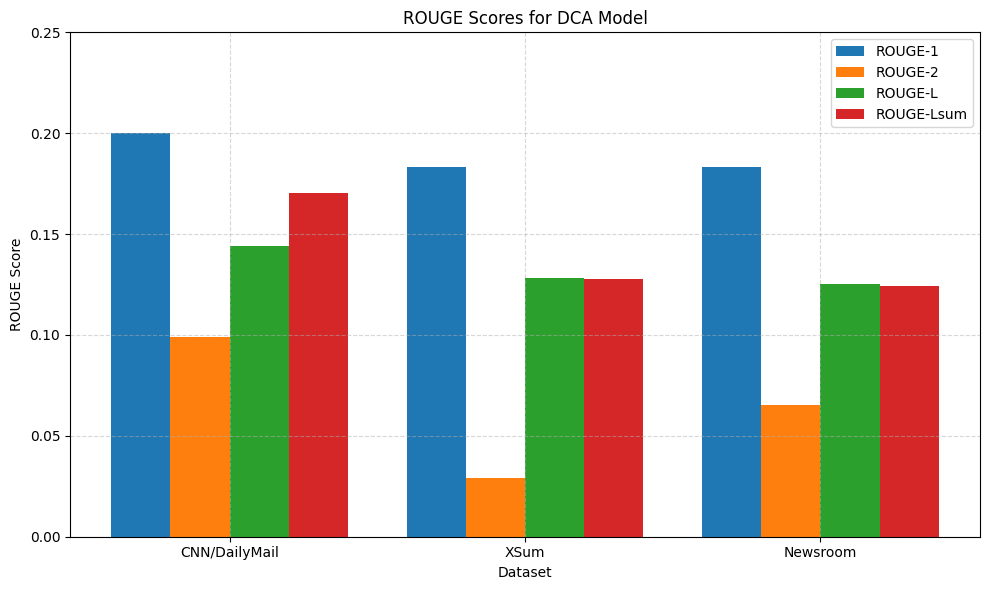

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ["CNN/DailyMail", "XSum", "Newsroom"]
rouge1 = [0.1999, 0.1831, 0.1834]
rouge2 = [0.0989, 0.0292, 0.0655]
rougeL = [0.1439, 0.1283, 0.1252]
rougeLsum = [0.1704, 0.1279, 0.1243]

x = np.arange(len(datasets))
width = 0.2

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, rouge1, width, label="ROUGE-1")
plt.bar(x - 0.5*width, rouge2, width, label="ROUGE-2")
plt.bar(x + 0.5*width, rougeL, width, label="ROUGE-L")
plt.bar(x + 1.5*width, rougeLsum, width, label="ROUGE-Lsum")

plt.xlabel("Dataset")
plt.ylabel("ROUGE Score")
plt.title("ROUGE Scores for DCA Model")
plt.xticks(x, datasets)
plt.ylim(0, 0.25)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##  Models Incorporating External Knowledge / Semantic Information (Optimized with Short Input and Chunking)


In [129]:
# Models Incorporating External Knowledge / Semantic Information (Optimized with Short Input and Chunking)

# 1️⃣ Install & Import
!pip install -q transformers datasets evaluate

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
from evaluate import load
import torch
import numpy as np
import random

# 2️⃣ Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "facebook/bart-large-cnn"

model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME).to(DEVICE)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
rouge = load("rouge")

# 3️⃣ Chunking Logic

def chunk_document(text, max_chunk_tokens=250):
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_chunk_tokens):
        chunk = " ".join(words[i:i + max_chunk_tokens])
        chunks.append(chunk)
    return chunks

# 4️⃣ Generate Summary from Chunks

def knowledge_generate_summary(text, max_input=512, max_output=100):
    chunks = chunk_document(text, max_chunk_tokens=250)  # smaller chunks for speed
    summaries = []
    for chunk in chunks:
        inputs = tokenizer(
            chunk,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=max_input
        ).to(DEVICE)

        with torch.no_grad():
            ids = model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_length=max_output,
                num_beams=2,  # fewer beams for faster decoding
                early_stopping=True
            )
        summary = tokenizer.decode(ids[0], skip_special_tokens=True)
        summaries.append(summary)

    return " ".join(summaries)

# 5️⃣ Evaluate Function

def evaluate_model(dataset_split, text_key, summary_key, sample_size=10):
    predictions, references = [], []
    failed = 0
    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]
            summary = knowledge_generate_summary(doc)
            predictions.append(summary)
            references.append(ref)
        except Exception as e:
            failed += 1
            print(f"❌ Example {i} failed: {e}")
    if len(predictions) == 0:
        print("⚠️ No summaries generated.")
        return {}
    print(f"✅ Evaluated {len(predictions)} examples, Failed: {failed}")
    return rouge.compute(predictions=predictions, references=references)

# 6️⃣ CNN/DailyMail
print("📙 Evaluating CNN/DailyMail...")
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_test = cnn["test"].shuffle(seed=42)
cnn_results = evaluate_model(cnn_test, text_key="article", summary_key="highlights")
print("✅ CNN/DM Results:", cnn_results)

# 7️⃣ XSum
print("📙 Evaluating XSum...")
xsum = load_dataset("knkarthick/xsum")
xsum_test = xsum["test"].shuffle(seed=42)
xsum_results = evaluate_model(xsum_test, text_key="dialogue", summary_key="summary")
print("✅ XSum Results:", xsum_results)

# 8️⃣ Newsroom
print("📙 Evaluating Newsroom...")
newsroom = load_dataset("json", data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"})
news_test = newsroom["test"].shuffle(seed=42)
news_results = evaluate_model(news_test, text_key="text", summary_key="summary")
print("✅ Newsroom Results:", news_results)


📙 Evaluating CNN/DailyMail...
✅ Evaluated 10 examples, Failed: 0
✅ CNN/DM Results: {'rouge1': np.float64(0.27334582123271356), 'rouge2': np.float64(0.12371267478173748), 'rougeL': np.float64(0.18111643024305307), 'rougeLsum': np.float64(0.2145755478437689)}
📙 Evaluating XSum...
✅ Evaluated 10 examples, Failed: 0
✅ XSum Results: {'rouge1': np.float64(0.16369725039113386), 'rouge2': np.float64(0.019032406882208357), 'rougeL': np.float64(0.10098229350797654), 'rougeLsum': np.float64(0.10009711715300665)}
📙 Evaluating Newsroom...
✅ Evaluated 10 examples, Failed: 0
✅ Newsroom Results: {'rouge1': np.float64(0.18247326916991313), 'rouge2': np.float64(0.05678403204850784), 'rougeL': np.float64(0.12903017996947247), 'rougeLsum': np.float64(0.12987356110746373)}


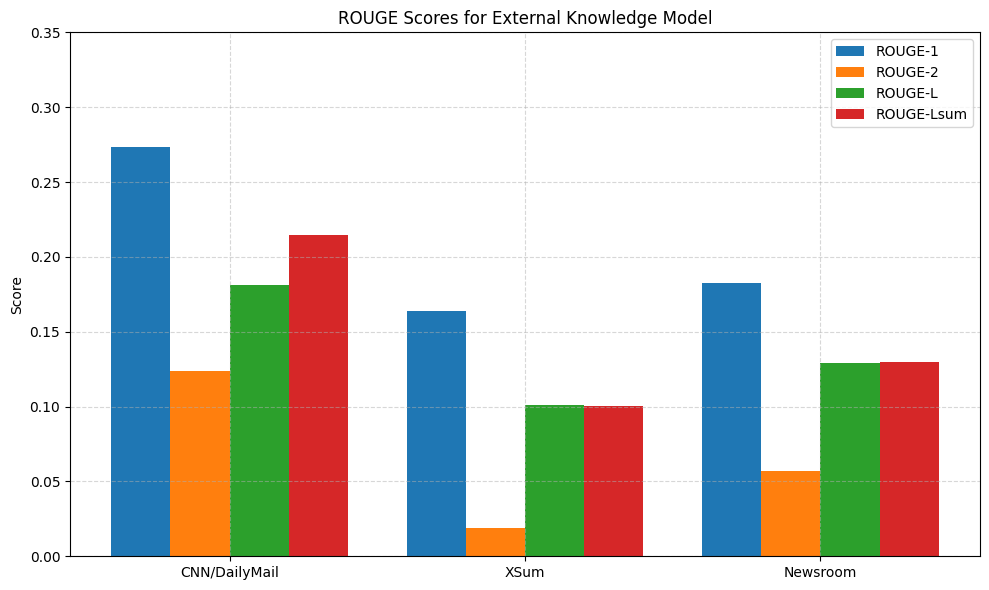

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# ROUGE scores
datasets = ["CNN/DailyMail", "XSum", "Newsroom"]
rouge1 = [0.2733, 0.1637, 0.1825]
rouge2 = [0.1237, 0.0190, 0.0568]
rougeL = [0.1811, 0.1010, 0.1290]
rougeLsum = [0.2146, 0.1001, 0.1299]

x = np.arange(len(datasets))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, rouge1, width, label='ROUGE-1')
plt.bar(x - 0.5*width, rouge2, width, label='ROUGE-2')
plt.bar(x + 0.5*width, rougeL, width, label='ROUGE-L')
plt.bar(x + 1.5*width, rougeLsum, width, label='ROUGE-Lsum')

plt.ylabel('Score')
plt.title('ROUGE Scores for External Knowledge Model')
plt.xticks(x, datasets)
plt.ylim(0, 0.35)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Absformer-inspired Summarization Pipeline (Clustering + BART)

In [131]:
# 1. Install
!pip install -q transformers datasets evaluate scikit-learn

# 2. Imports
from transformers import BartTokenizer, BartForConditionalGeneration
from datasets import load_dataset
from evaluate import load
from sklearn.cluster import KMeans
import torch
import re

# 3. Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(MODEL_NAME)
model = BartForConditionalGeneration.from_pretrained(MODEL_NAME).to(DEVICE)
rouge = load("rouge")

# 4. Sentence Splitter (without nltk)
def simple_sentence_split(text):
    text = re.sub(r'\s+', ' ', text)
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return [s.strip() for s in sentences if len(s.strip()) > 20]

# 5. Generate Summary using Absformer-style pipeline
def absformer_summary(text, num_clusters=3, max_input_length=512, max_output_length=150):
    sents = simple_sentence_split(text)
    if len(sents) <= num_clusters:
        input_text = " ".join(sents)
    else:
        # Use sentence embeddings from BART encoder
        inputs = tokenizer(sents, return_tensors="pt", padding=True, truncation=True).to(DEVICE)
        with torch.no_grad():
            enc_outputs = model.model.encoder(**inputs)
        embeddings = enc_outputs.last_hidden_state.mean(dim=1).cpu().numpy()

        # Cluster
        km = KMeans(n_clusters=num_clusters, random_state=42)
        km.fit(embeddings)
        cluster_centers = km.cluster_centers_

        # Select one sentence per cluster
        selected = []
        for i in range(num_clusters):
            cluster_indices = [j for j, label in enumerate(km.labels_) if label == i]
            center = cluster_centers[i]
            closest_idx = min(cluster_indices, key=lambda j: ((embeddings[j] - center) ** 2).sum())
            selected.append(sents[closest_idx])

        input_text = " ".join(selected)

    # Generate
    tokenized = tokenizer(input_text, return_tensors="pt", max_length=max_input_length, truncation=True).to(DEVICE)
    summary_ids = model.generate(tokenized["input_ids"], max_length=max_output_length, num_beams=4)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# 6. Evaluation Function
def evaluate_model(dataset_split, text_key, summary_key, sample_size=10):
    preds, refs = [], []
    for i, ex in enumerate(dataset_split.select(range(sample_size))):
        try:
            pred = absformer_summary(ex[text_key])
            preds.append(pred)
            refs.append(ex[summary_key])
        except Exception as e:
            print(f"❌ Example {i} failed: {e}")
    if not preds:
        return {}
    return rouge.compute(predictions=preds, references=refs)

# 7. Run Benchmark

# CNN/DailyMail
print("📙 CNN/DailyMail")
cnn = load_dataset("cnn_dailymail", "3.0.0")["test"].shuffle(seed=42)
cnn_results = evaluate_model(cnn, text_key="article", summary_key="highlights")
print("✅ CNN/DM:", cnn_results)

# XSum
print("📙 XSum")
xsum = load_dataset("knkarthick/xsum")["test"].shuffle(seed=42)
xsum_results = evaluate_model(xsum, text_key="dialogue", summary_key="summary")
print("✅ XSum:", xsum_results)

# Newsroom
print("📙 Newsroom")
news = load_dataset("json", data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"})["test"].shuffle(seed=42)
news_results = evaluate_model(news, text_key="text", summary_key="summary")
print("✅ Newsroom:", news_results)


📙 CNN/DailyMail


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


✅ CNN/DM: {'rouge1': np.float64(0.2667461142925073), 'rouge2': np.float64(0.06513337091956149), 'rougeL': np.float64(0.15019351379497742), 'rougeLsum': np.float64(0.22042153224808309)}
📙 XSum
✅ XSum: {'rouge1': np.float64(0.140401751133007), 'rouge2': np.float64(0.011525704809286899), 'rougeL': np.float64(0.0791228567352541), 'rougeLsum': np.float64(0.07862794900350425)}
📙 Newsroom
✅ Newsroom: {'rouge1': np.float64(0.2324821036275528), 'rouge2': np.float64(0.049561081882200916), 'rougeL': np.float64(0.16489735860392923), 'rougeLsum': np.float64(0.1653996825323997)}


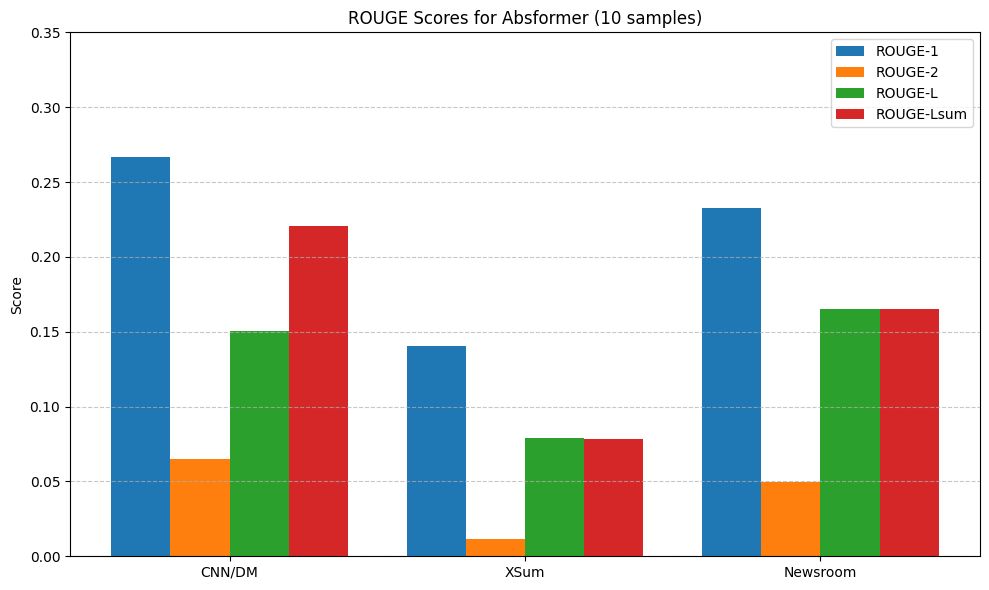

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Labels and values
datasets = ["CNN/DM", "XSum", "Newsroom"]
rouge1 = [0.2667, 0.1404, 0.2325]
rouge2 = [0.0651, 0.0115, 0.0496]
rougeL = [0.1502, 0.0791, 0.1649]
rougeLsum = [0.2204, 0.0786, 0.1654]

x = np.arange(len(datasets))
width = 0.2

# Plot
plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, rouge1, width, label="ROUGE-1")
plt.bar(x - 0.5*width, rouge2, width, label="ROUGE-2")
plt.bar(x + 0.5*width, rougeL, width, label="ROUGE-L")
plt.bar(x + 1.5*width, rougeLsum, width, label="ROUGE-Lsum")

# Labels & legend
plt.xticks(x, datasets)
plt.ylabel("Score")
plt.title("ROUGE Scores for Absformer (10 samples)")
plt.ylim(0, 0.35)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## Long-T5

In [133]:
# 📌 Install Dependencies
!pip install -q transformers datasets evaluate

# 📌 Imports
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
from evaluate import load
import numpy as np

# 📌 Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "google/long-t5-tglobal-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME).to(DEVICE)
rouge = load("rouge")

# 📌 Inference Function
def generate_summary(text, max_input=2048, max_output=256):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=max_input
    ).to(DEVICE)
    with torch.no_grad():
        outputs = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_output,
            num_beams=4,
            early_stopping=True
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# 📌 Evaluation Function
def evaluate_model(dataset_split, text_key, summary_key, sample_size=10):
    preds, refs = [], []
    failed = 0
    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]
            summary = generate_summary(doc)
            preds.append(summary)
            refs.append(ref)
        except Exception as e:
            failed += 1
            print(f"❌ Example {i} failed: {e}")
    if not preds:
        print("⚠️ No summaries generated.")
        return {}
    print(f"✅ Evaluated {len(preds)} examples, Failed: {failed}")
    return rouge.compute(predictions=preds, references=refs)

# 📘 CNN/DailyMail
print("📙 CNN/DailyMail")
cnn = load_dataset("cnn_dailymail", "3.0.0")["test"].shuffle(seed=42)
cnn_result = evaluate_model(cnn, text_key="article", summary_key="highlights")
print("✅ CNN/DM:", cnn_result)

# 📘 XSum
print("📙 XSum")
xsum = load_dataset("knkarthick/xsum")["test"].shuffle(seed=42)
xsum_result = evaluate_model(xsum, text_key="dialogue", summary_key="summary")
print("✅ XSum:", xsum_result)

# 📘 Newsroom
print("📙 Newsroom")
newsroom = load_dataset("json", data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"})["test"].shuffle(seed=42)
newsroom_result = evaluate_model(newsroom, text_key="text", summary_key="summary")
print("✅ Newsroom:", newsroom_result)


config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

📙 CNN/DailyMail
✅ Evaluated 10 examples, Failed: 0
✅ CNN/DM: {'rouge1': np.float64(0.3099483874438995), 'rouge2': np.float64(0.10444117022012021), 'rougeL': np.float64(0.21297044886343652), 'rougeLsum': np.float64(0.24967806500955123)}
📙 XSum
✅ Evaluated 10 examples, Failed: 0
✅ XSum: {'rouge1': np.float64(0.15119421982629527), 'rouge2': np.float64(0.01702127659574468), 'rougeL': np.float64(0.10690694746759438), 'rougeLsum': np.float64(0.10575749974671808)}
📙 Newsroom
✅ Evaluated 10 examples, Failed: 0
✅ Newsroom: {'rouge1': np.float64(0.18702350797860284), 'rouge2': np.float64(0.05641464104152631), 'rougeL': np.float64(0.1335808251010766), 'rougeLsum': np.float64(0.13436636630838578)}


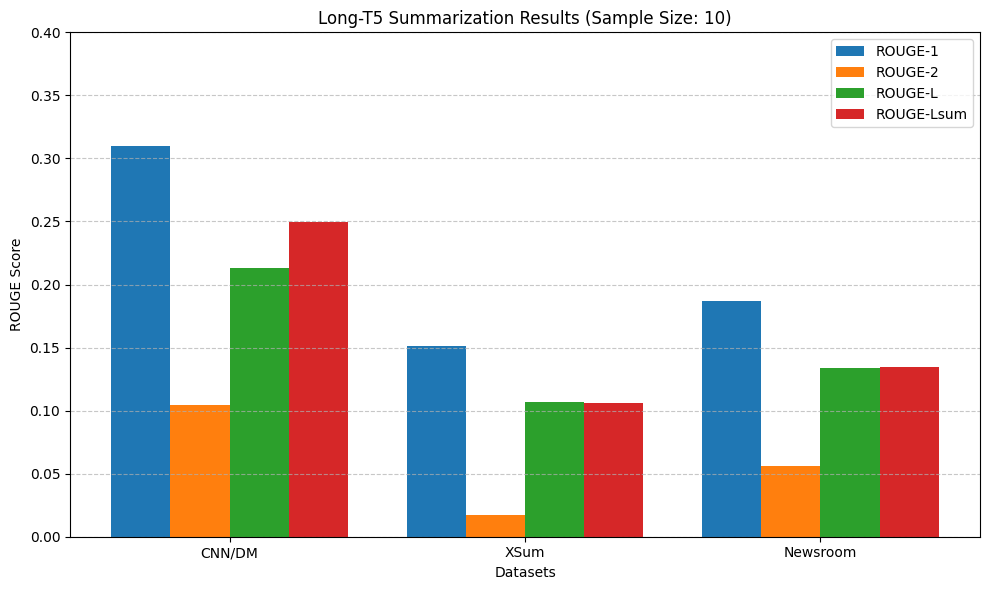

In [134]:
import matplotlib.pyplot as plt

# Dataset names
datasets = ['CNN/DM', 'XSum', 'Newsroom']

# ROUGE scores
rouge1 = [0.3099, 0.1512, 0.1870]
rouge2 = [0.1044, 0.0170, 0.0564]
rougeL = [0.2130, 0.1069, 0.1336]
rougeLsum = [0.2497, 0.1058, 0.1344]

x = range(len(datasets))
bar_width = 0.2

plt.figure(figsize=(10, 6))
plt.bar([i - 1.5*bar_width for i in x], rouge1, width=bar_width, label='ROUGE-1')
plt.bar([i - 0.5*bar_width for i in x], rouge2, width=bar_width, label='ROUGE-2')
plt.bar([i + 0.5*bar_width for i in x], rougeL, width=bar_width, label='ROUGE-L')
plt.bar([i + 1.5*bar_width for i in x], rougeLsum, width=bar_width, label='ROUGE-Lsum')

plt.xlabel('Datasets')
plt.ylabel('ROUGE Score')
plt.title('Long-T5 Summarization Results (Sample Size: 10)')
plt.xticks(x, datasets)
plt.ylim(0, 0.4)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##  PRIMERA (AllenAI)

In [135]:

# 1️⃣ Install Dependencies
!pip install -q transformers datasets evaluate

# 2️⃣ Imports
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
from evaluate import load
import torch
import matplotlib.pyplot as plt

# 3️⃣ Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "allenai/PRIMERA"

model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME).to(DEVICE)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
rouge = load("rouge")

# 4️⃣ Summarization Function
def generate_summary(text, max_input=1024, max_output=150):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=max_input,
    ).to(DEVICE)

    with torch.no_grad():
        summary_ids = model.generate(
            inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_length=max_output,
            num_beams=4,
            early_stopping=True,
        )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# 5️⃣ Evaluation Function
def evaluate_model(dataset_split, text_key, summary_key, sample_size=10):
    predictions, references = [], []
    failed = 0
    for i, example in enumerate(dataset_split.select(range(sample_size))):
        try:
            doc = example[text_key]
            ref = example[summary_key]
            summary = generate_summary(doc)
            predictions.append(summary)
            references.append(ref)
        except Exception as e:
            failed += 1
            print(f"❌ Example {i} failed: {e}")

    if not predictions:
        print("⚠️ No summaries generated.")
        return {}
    print(f"✅ Evaluated {len(predictions)} examples, Failed: {failed}")
    return rouge.compute(predictions=predictions, references=references)

# 6️⃣ Evaluate CNN/DailyMail
print("📙 CNN/DailyMail")
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_test = cnn["test"].shuffle(seed=42)
cnn_results = evaluate_model(cnn_test, text_key="article", summary_key="highlights")
print("✅ CNN/DM:", cnn_results)

# 7️⃣ Evaluate XSum
print("📙 XSum")
xsum = load_dataset("knkarthick/xsum")
xsum_test = xsum["test"].shuffle(seed=42)
xsum_results = evaluate_model(xsum_test, text_key="dialogue", summary_key="summary")
print("✅ XSum:", xsum_results)

# 8️⃣ Evaluate Newsroom
print("📙 Newsroom")
news = load_dataset("json", data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"})
news_test = news["test"].shuffle(seed=42)
news_results = evaluate_model(news_test, text_key="text", summary_key="summary")
print("✅ Newsroom:", news_results)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/20.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/283 [00:00<?, ?B/s]

📙 CNN/DailyMail
✅ Evaluated 10 examples, Failed: 0
✅ CNN/DM: {'rouge1': np.float64(0.2752465330081527), 'rouge2': np.float64(0.0868842836658503), 'rougeL': np.float64(0.1712720707778248), 'rougeLsum': np.float64(0.21340081371513747)}
📙 XSum
✅ Evaluated 10 examples, Failed: 0
✅ XSum: {'rouge1': np.float64(0.1497683099530556), 'rouge2': np.float64(0.02862497699529128), 'rougeL': np.float64(0.10063692175387155), 'rougeLsum': np.float64(0.10018535449077204)}
📙 Newsroom
✅ Evaluated 10 examples, Failed: 0
✅ Newsroom: {'rouge1': np.float64(0.28226673604016983), 'rouge2': np.float64(0.17535147861994238), 'rougeL': np.float64(0.21604135208430805), 'rougeLsum': np.float64(0.21748777455375906)}


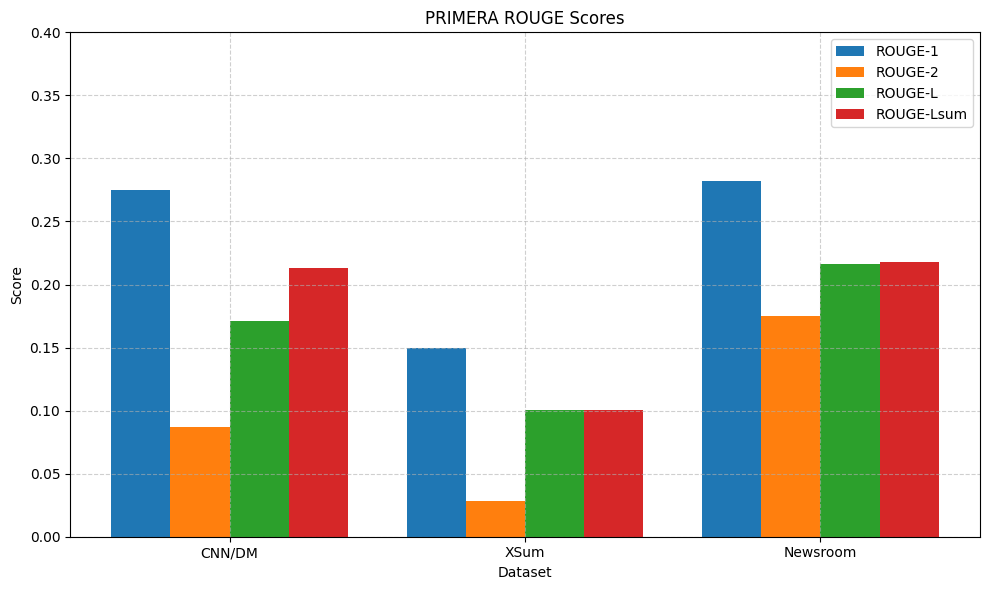

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ["CNN/DM", "XSum", "Newsroom"]

# ROUGE scores
rouge1 = [0.2752, 0.1498, 0.2823]
rouge2 = [0.0869, 0.0286, 0.1754]
rougeL = [0.1713, 0.1006, 0.2160]
rougeLsum = [0.2134, 0.1002, 0.2175]

# Plotting
x = np.arange(len(datasets))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, rouge1, width, label='ROUGE-1')
plt.bar(x - 0.5*width, rouge2, width, label='ROUGE-2')
plt.bar(x + 0.5*width, rougeL, width, label='ROUGE-L')
plt.bar(x + 1.5*width, rougeLsum, width, label='ROUGE-Lsum')

plt.xlabel("Dataset")
plt.ylabel("Score")
plt.title("PRIMERA ROUGE Scores")
plt.xticks(x, datasets)
plt.ylim(0, 0.4)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
